System Function H(z):
z⋅(z + 0.333333333333333)
─────────────────────────
    2                    
   z  - 0.75⋅z + 0.125   

Impulse Response h[n]:
h[0] = 1
h[1] = 0.75
h[2] = 0.4375
h[3] = 0.234375
h[4] = 0.12109375
h[5] = 0.0615234375
h[6] = 0.031005859375
h[7] = 0.01556396484375
h[8] = 0.0077972412109375
h[9] = 0.003902435302734375


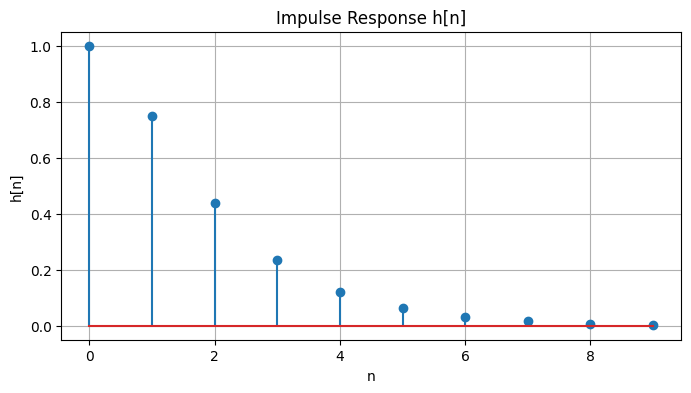

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def system_function():
    # Define z as a symbol
    z = sp.Symbol('z')

    # Numerator and Denominator of H(z)
    numerator = 1 + (1/3) * z**-1
    denominator = 1 - (3/4) * z**-1 + (1/8) * z**-2

    # System function H(z)
    H_z = numerator / denominator
    return sp.simplify(H_z)

def impulse_response(num_samples=10):
    # Initialize the impulse response
    h = [1]  # h[0] = 1
    
    # Calculate h[n] using the difference equation
    for n in range(1, num_samples):
        if n == 1:
            # Special case for h[1] since h[n-2] is not defined
            h.append((3/4) * h[n-1])
        else:
            h.append((3/4) * h[n-1] - (1/8) * h[n-2])
    
    return h

# Part 1: System Function H(z)
H_z = system_function()
print("System Function H(z):")
sp.pprint(H_z)

# Part 2: Impulse Response h[n]
num_samples = 10
h = impulse_response(num_samples)

print("\nImpulse Response h[n]:")
for i in range(num_samples):
    print(f"h[{i}] = {h[i]}")

# Plotting the Impulse Response
plt.figure(figsize=(8, 4))
plt.stem(range(num_samples), h)
plt.title('Impulse Response h[n]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()
